In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
# Import average motor (outputs and labels) and loss values
# for each data moment. When validating on
# networks trained for 6 epochs on direct vs.
# direct + follow data. Validation set is 
# only direct mode data.

directfollow = pd.read_csv('df.csv')
direct = pd.read_csv('d.csv')
print('Example of Direct Mode Trained Data')
print(direct.head(5))
print('Example of Direct + Follow Mode Trained Data')
print(directfollow.head(5))

Example of Direct Mode Trained Data
   Output Steer  Human Steer  Output Motor  Human Motor      Loss
0      0.567724     0.506995      0.558656     0.553650  0.002044
1      0.593679     0.522031      0.567659     0.545455  0.002892
2      0.588618     0.679564      0.584449     0.555556  0.006642
3      0.394144     0.450564      0.559043     0.592571  0.002773
4      0.143396     0.170694      0.565912     0.553868  0.000458
Example of Direct + Follow Mode Trained Data
   Output Steer  Human Steer  Output Motor  Human Motor      Loss
0      0.064290     0.099656      0.585710     0.597538  0.000721
1      0.791055     0.898238      0.565876     0.580196  0.005889
2      0.839735     0.888928      0.568727     0.545455  0.001495
3      0.261225     0.251944      0.597557     0.597222  0.000056
4      0.141044     0.015043      0.551876     0.555556  0.007951


### Marginal Steer Histograms

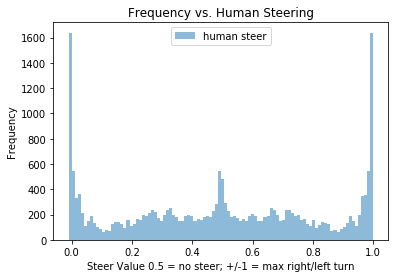

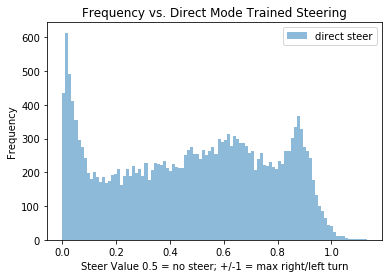

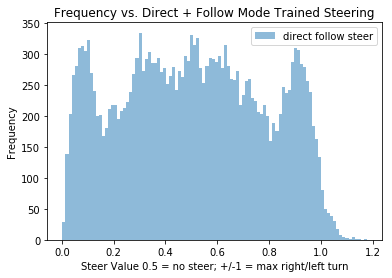

In [21]:
# Find histograms of steer outputs of the network
bins = 100

plt.hist(direct['Human Steer'], bins, alpha=0.5, label='human steer')
plt.title('Frequency vs. Human Steering')
plt.xlabel('Steer Value 0.5 = no steer; +/-1 = max right/left turn')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.hist(direct['Output Steer'], bins, alpha=0.5, label='direct steer')
plt.title('Frequency vs. Direct Mode Trained Steering')
plt.xlabel('Steer Value 0.5 = no steer; +/-1 = max right/left turn')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.hist(directfollow['Output Steer'], bins, alpha=0.5, label='direct follow steer')
plt.title('Frequency vs. Direct + Follow Mode Trained Steering')
plt.xlabel('Steer Value 0.5 = no steer; +/-1 = max right/left turn')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Marginal Motor Histograms

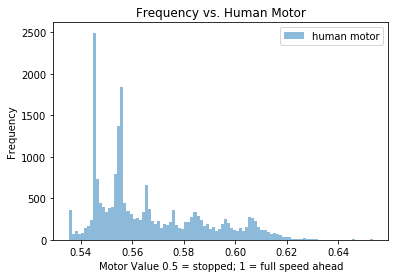

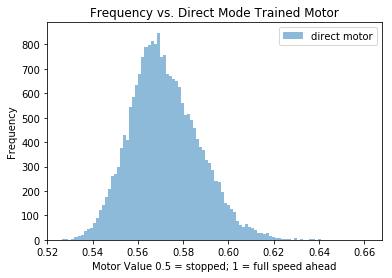

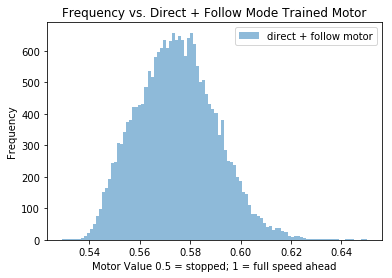

In [23]:
# Find histograms of steer outputs of the network
bins = 100

plt.hist(direct['Human Motor'], bins, alpha=0.5, label='human motor')
plt.title('Frequency vs. Human Motor')
plt.xlabel('Motor Value 0.5 = stopped; 1 = full speed ahead')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.hist(direct['Output Motor'], bins, alpha=0.5, label='direct motor')
plt.title('Frequency vs. Direct Mode Trained Motor')
plt.xlabel('Motor Value 0.5 = stopped; 1 = full speed ahead')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.hist(directfollow['Output Motor'], bins, alpha=0.5, label='direct + follow motor')
plt.title('Frequency vs. Direct + Follow Mode Trained Motor')
plt.xlabel('Motor Value 0.5 = stopped; 1 = full speed ahead')
plt.ylabel('Frequency')
plt.legend()
plt.show()

-0.294020700029


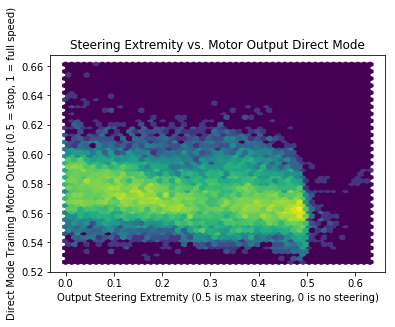

-0.290521597924


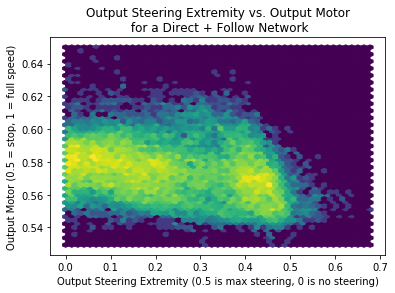

-0.18254181898


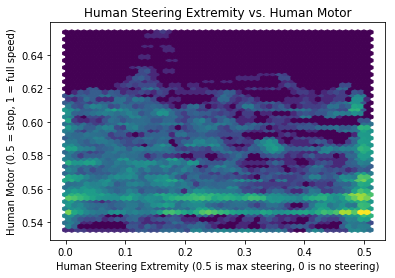

In [19]:
# Calculate correlation between extremity of steering result and 
# motor value magnitude. Steering values are scaled to -0.5 to 0.5
# and are then abs() to get the magnitude of steering.

plt.hexbin((direct['Output Steer'] - 0.5).abs(), direct['Output Motor'], gridsize=50, bins='log')
print(stats.linregress((direct['Output Steer'] - 0.5).abs(), direct['Output Motor']).rvalue)
plt.title('Steering Extremity vs. Motor Output Direct Mode')
plt.ylabel('Direct Mode Training Motor Output (0.5 = stop, 1 = full speed)')
plt.xlabel('Output Steering Extremity (0.5 is max steering, 0 is no steering)')
plt.show()

plt.hexbin((directfollow['Output Steer']- 0.5).abs(), directfollow['Output Motor'], gridsize=50, bins='log')
print(stats.linregress((directfollow['Output Steer']- 0.5).abs(), directfollow['Output Motor']).rvalue)
plt.title('Output Steering Extremity vs. Output Motor\n for a Direct + Follow Network')
plt.ylabel('Output Motor (0.5 = stop, 1 = full speed)')
plt.xlabel('Output Steering Extremity (0.5 is max steering, 0 is no steering)')
plt.show()

plt.hexbin((direct['Human Steer']- 0.5).abs(), direct['Human Motor'], gridsize=50, bins='log')
print(stats.linregress((direct['Human Steer']- 0.5).abs(), direct['Human Motor']).rvalue)
plt.title('Human Steering Extremity vs. Human Motor')
plt.ylabel('Human Motor (0.5 = stop, 1 = full speed)')
plt.xlabel('Human Steering Extremity (0.5 is max steering, 0 is no steering)')
plt.show()

### Negative Correlation between Extremity of Steering and Speed
This results above are importaint, it shows that as the car is turning (or as it has to make a complex decision), the network slows down. This is interesting because the behavior is not seen within the dataset itself, this is an emergent behavior. The R = -0.3 means there is a [weak correlation between these factors](http://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/). More research should be done on what factors increase this relationship (# of epochs of training etc.)